<a href="https://colab.research.google.com/github/MayerT1/Forest_Structure_Function_Module/blob/main/Meta_model_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Meta Model approach

https://dataaspirant.com/stacking-technique/

https://www.youtube.com/watch?v=0BGLfYY26zQ

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

https://github.com/dataprofessor/python/blob/main/Stacking_Classifier.ipynb

In [2]:
!pip install shap

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import tree
import shap

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from subprocess import check_output

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/sample_partition
!ls

/content/drive/MyDrive/sample_partition
op_rf.csv  rf_individualtree.png  temp_file.pdf  training.csv
out.csv    temp_file		  testing.csv	 validation.csv


In [6]:
train=pd.read_csv("training.csv")
print("Train dataset has {} samples and {} attributes".format(*train.shape))


train_copy = train.copy()
train_copy

Train dataset has 4000 samples and 39 attributes


,system:index,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,...,ndratio_D,random,ratio_A,ratio_D,rh100,rh100_1,sixth,slope,wetness,.geo
0,0,-0.476459,-0.483751,-0.130499,-0.082585,0.130499,0.082585,-0.571429,-0.544580,0.330213,...,-0.244325,0.375833,0.616171,0.607297,12.17,12.17,-0.025443,8.962334,-0.036204,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1,-0.513142,-0.506553,-0.063932,-0.094034,0.063932,0.094034,-0.558744,-0.573255,0.334227,...,-0.367666,0.489221,0.556244,0.462346,9.02,9.02,-0.026757,30.805159,-0.067350,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2,-0.347756,-0.431080,-0.198843,-0.079194,0.198843,0.079194,-0.511246,-0.494425,0.279654,...,-0.281740,0.390793,0.615712,0.560379,30.37,30.37,-0.025926,24.337640,-0.036167,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,3,-0.464122,-0.449512,-0.094130,-0.146172,0.094130,0.146172,-0.534884,-0.558573,0.305338,...,-0.278446,0.339658,0.403031,0.564399,6.03,6.03,-0.026175,15.251116,-0.027220,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,4,-0.514694,-0.500345,-0.176820,-0.127935,0.176820,0.127935,-0.633830,-0.590409,0.408838,...,-0.310714,0.632521,0.601882,0.525885,29.63,29.63,-0.024789,40.856106,-0.025176,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-0.447009,-0.485910,-0.224438,-0.234370,0.224438,0.234370,-0.610226,-0.647239,0.351286,...,-0.237188,0.757970,0.661079,0.616570,24.16,24.16,-0.021303,27.470978,0.010576,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3996,3996,-0.492698,-0.509375,-0.001274,-0.037905,0.001274,0.037905,-0.493663,-0.536472,0.274115,...,-0.348678,0.986754,0.661795,0.482934,18.19,18.19,-0.022175,44.096733,-0.069757,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3997,3997,-0.417832,-0.417754,-0.080108,-0.127399,0.080108,0.127399,-0.481813,-0.517541,0.272994,...,-0.406340,0.639939,0.690515,0.422131,12.86,12.86,-0.027658,24.573717,-0.013164,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3998,3998,-0.481723,-0.472172,-0.125578,-0.095149,0.125578,0.095149,-0.572659,-0.542671,0.316540,...,-0.380542,0.449982,0.591584,0.448706,16.18,16.18,-0.026552,39.699720,-0.023182,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


Test dataset has 4000 samples and 39 attributes
rh100 height distribution of Testing Data set


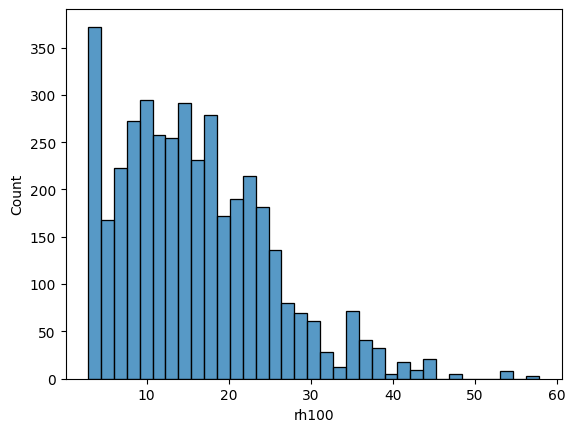

In [7]:
test=pd.read_csv("testing.csv")
print("Test dataset has {} samples and {} attributes".format(*test.shape))

print("rh100 height distribution of Testing Data set")
sns.histplot(test,x="rh100")

test["rh100"].describe()

test_copy = test.copy()


validation dataset has 4000 samples and 39 attributes
rh100 height distribution of validation Data set


,system:index,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,...,ndratio_D,random,ratio_A,ratio_D,rh100,rh100_1,sixth,slope,wetness,.geo
0,0,-0.494053,-0.504159,-0.148396,-0.110995,0.148396,0.110995,-0.598564,-0.582714,0.434859,...,-0.343695,0.919010,0.490248,0.488433,11.57,11.57,-0.022234,33.972160,-0.044953,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1,-0.447435,-0.465173,-0.218438,-0.193754,0.218438,0.193754,-0.606587,-0.604414,0.304677,...,-0.412988,0.796395,0.662576,0.415441,24.82,24.82,-0.024862,37.160007,-0.020732,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2,-0.421499,-0.421931,-0.034435,-0.046049,0.034435,0.046049,-0.449411,-0.458946,0.244350,...,-0.314065,0.320410,0.415834,0.521994,21.51,21.51,-0.028558,35.237755,-0.054639,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,3,-0.559169,-0.541922,0.011822,0.004801,-0.011822,-0.004801,-0.550989,-0.538672,0.312022,...,-0.327964,0.986099,0.659977,0.506065,8.57,8.57,-0.025516,18.442694,-0.079794,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,4,-0.492933,-0.505962,-0.170624,-0.193645,0.170624,0.193645,-0.612078,-0.637087,0.370927,...,-0.296168,0.312414,0.544326,0.543010,13.55,13.55,-0.022800,37.830444,-0.033048,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-0.386014,-0.439079,-0.279535,-0.301627,0.279535,0.301627,-0.600728,-0.656509,0.383362,...,-0.194067,0.851925,0.636311,0.674948,26.56,26.56,-0.020387,20.973866,0.020052,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3996,3996,-0.526805,-0.452232,-0.170163,-0.193986,0.170163,0.193986,-0.639630,-0.592931,0.388036,...,-0.296479,0.490643,0.716262,0.542639,5.76,5.76,-0.023862,40.621720,0.013260,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3997,3997,-0.494771,-0.529063,-0.217245,-0.137723,0.217245,0.137723,-0.642911,-0.621255,0.403282,...,-0.218779,0.933606,0.539499,0.640986,19.40,19.40,-0.021803,28.870852,-0.007699,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3998,3998,-0.540741,-0.491472,-0.339944,-0.305695,0.339944,0.305695,-0.743934,-0.692829,0.677823,...,-0.268119,0.875979,0.625153,0.577139,25.32,25.32,-0.020601,34.309658,0.026200,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


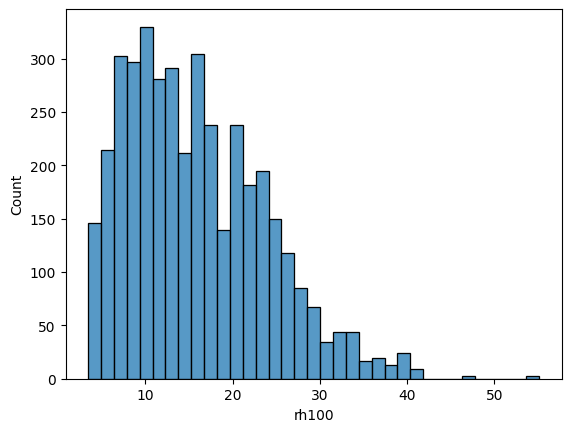

In [8]:
validation=pd.read_csv("validation.csv")
print("validation dataset has {} samples and {} attributes".format(*validation.shape))

print("rh100 height distribution of validation Data set")
sns.histplot(validation,x="rh100")

validation["rh100"].describe()

validation_copy = validation.copy()
validation_copy

# Data handeling

train

In [9]:
y_train=pd.DataFrame(train_copy['rh100'])
y_train

,rh100
0,12.17
1,9.02
2,30.37
3,6.03
4,29.63
...,...
3995,24.16
3996,18.19
3997,12.86
3998,16.18


In [10]:
train_copy.drop(['system:index', 'class', 'rh100', 'rh100_1', 'random', '.geo'], axis=1, inplace=True)
x_train = train_copy
x_train

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,fifth,fourth,greenness,ndratio_A,ndratio_D,ratio_A,ratio_D,sixth,slope,wetness
0,-0.476459,-0.483751,-0.130499,-0.082585,0.130499,0.082585,-0.571429,-0.544580,0.330213,-0.284712,...,0.028322,-0.048771,0.072463,-0.237492,-0.244325,0.616171,0.607297,-0.025443,8.962334,-0.036204
1,-0.513142,-0.506553,-0.063932,-0.094034,0.063932,0.094034,-0.558744,-0.573255,0.334227,-0.278585,...,0.050240,-0.052690,0.084146,-0.285145,-0.367666,0.556244,0.462346,-0.026757,30.805159,-0.067350
2,-0.347756,-0.431080,-0.198843,-0.079194,0.198843,0.079194,-0.511246,-0.494425,0.279654,-0.238936,...,0.022685,-0.051023,0.036122,-0.237844,-0.281740,0.615712,0.560379,-0.025926,24.337640,-0.036167
3,-0.464122,-0.449512,-0.094130,-0.146172,0.094130,0.146172,-0.534884,-0.558573,0.305338,-0.245688,...,0.031012,-0.052227,0.055076,-0.425485,-0.278446,0.403031,0.564399,-0.026175,15.251116,-0.027220
4,-0.514694,-0.500345,-0.176820,-0.127935,0.176820,0.127935,-0.633830,-0.590409,0.408838,-0.285918,...,0.017475,-0.052967,0.063344,-0.248531,-0.310714,0.601882,0.525885,-0.024789,40.856106,-0.025176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.447009,-0.485910,-0.224438,-0.234370,0.224438,0.234370,-0.610226,-0.647239,0.351286,-0.247138,...,0.004797,-0.054043,0.028199,-0.204037,-0.237188,0.661079,0.616570,-0.021303,27.470978,0.010576
3996,-0.492698,-0.509375,-0.001274,-0.037905,0.001274,0.037905,-0.493663,-0.536472,0.274115,-0.266557,...,0.045228,-0.050750,0.057290,-0.203518,-0.348678,0.661795,0.482934,-0.022175,44.096733,-0.069757
3997,-0.417832,-0.417754,-0.080108,-0.127399,0.080108,0.127399,-0.481813,-0.517541,0.272994,-0.268069,...,0.017810,-0.055982,0.036919,-0.183071,-0.406340,0.690515,0.422131,-0.027658,24.573717,-0.013164
3998,-0.481723,-0.472172,-0.125578,-0.095149,0.125578,0.095149,-0.572659,-0.542671,0.316540,-0.265336,...,0.020602,-0.054387,0.059407,-0.256609,-0.380542,0.591584,0.448706,-0.026552,39.699720,-0.023182


test

In [11]:
y_test=pd.DataFrame(test_copy['rh100'])
y_test

,rh100
0,12.280000
1,3.370000
2,13.070000
3,7.567164
4,17.070000
...,...
3995,11.010000
3996,17.630000
3997,17.070000
3998,27.987840


In [12]:
test_copy.drop(['system:index', 'class', 'rh100', 'rh100_1', 'random', '.geo'], axis=1, inplace=True)
x_test = test_copy
x_test

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,fifth,fourth,greenness,ndratio_A,ndratio_D,ratio_A,ratio_D,sixth,slope,wetness
0,-0.404359,-0.403206,-0.106046,-0.094519,0.106046,0.094519,-0.489418,-0.479395,0.280048,-0.245015,...,0.017970,-0.053268,0.041886,-0.313204,-0.217043,0.522993,0.643327,-0.029901,31.171730,-0.013677
1,-0.316379,-0.248449,0.014466,-0.024751,-0.014466,0.024751,-0.303301,-0.271563,0.181741,-0.157029,...,0.032097,-0.062680,-0.011794,-0.375773,-0.262651,0.453728,0.583969,-0.047370,1.538928,-0.015089
2,-0.412576,-0.440464,-0.047392,-0.077408,0.047392,0.077408,-0.451147,-0.500696,0.207759,-0.194075,...,0.031524,-0.049845,0.055778,-0.287573,-0.272602,0.553310,0.571584,-0.027832,26.651260,-0.036331
3,-0.395017,-0.406548,-0.097712,-0.054612,0.097712,0.054612,-0.474417,-0.451156,0.267199,-0.229454,...,0.028268,-0.058867,0.039573,-0.257218,-0.257836,0.590814,0.590033,-0.032311,14.870021,-0.033756
4,-0.380775,-0.411326,0.078998,0.032538,-0.078998,-0.032538,-0.311136,-0.382499,0.187058,-0.222562,...,0.071809,-0.059934,0.024148,-0.330898,-0.309484,0.502744,0.527320,-0.033669,12.082216,-0.097926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.524856,-0.394036,-0.257958,-0.319662,0.257958,0.319662,-0.689466,-0.633042,0.761281,-0.230641,...,0.000039,-0.046671,0.018431,-0.329753,-0.257792,0.504038,0.590088,-0.024836,25.862888,0.035644
3996,-0.568110,-0.518643,-0.337049,-0.337572,0.337049,0.337572,-0.759693,-0.728614,0.633738,-0.272660,...,0.009285,-0.047805,0.089733,-0.239558,-0.314404,0.613478,0.521603,-0.022218,20.913511,0.025703
3997,-0.468282,-0.477433,-0.291122,-0.166897,0.291122,0.166897,-0.668297,-0.596777,0.640345,-0.194943,...,-0.002541,-0.045117,0.004175,-0.298684,-0.252139,0.540021,0.597267,-0.025622,35.833694,0.020547
3998,-0.458674,-0.350256,-0.285587,-0.388324,0.285587,0.388324,-0.658061,-0.650752,0.472604,-0.214368,...,-0.009911,-0.053404,-0.007594,-0.305214,-0.340926,0.532316,0.491506,-0.021797,35.708370,0.040060


In [13]:
y_validation = pd.DataFrame(validation_copy['rh100'])
y_validation

,rh100
0,11.57
1,24.82
2,21.51
3,8.57
4,13.55
...,...
3995,26.56
3996,5.76
3997,19.40
3998,25.32


In [14]:
validation_copy.drop(['system:index', 'class', 'rh100', 'rh100_1', 'random', '.geo'], axis=1, inplace=True)
x_validation = validation_copy
x_validation

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,fifth,fourth,greenness,ndratio_A,ndratio_D,ratio_A,ratio_D,sixth,slope,wetness
0,-0.494053,-0.504159,-0.148396,-0.110995,0.148396,0.110995,-0.598564,-0.582714,0.434859,-0.276294,...,0.045990,-0.045192,0.094310,-0.342059,-0.343695,0.490248,0.488433,-0.022234,33.972160,-0.044953
1,-0.447435,-0.465173,-0.218438,-0.193754,0.218438,0.193754,-0.606587,-0.604414,0.304677,-0.231609,...,0.040798,-0.049039,0.089932,-0.202953,-0.412988,0.662576,0.415441,-0.024862,37.160007,-0.020732
2,-0.421499,-0.421931,-0.034435,-0.046049,0.034435,0.046049,-0.449411,-0.458946,0.244350,-0.276641,...,0.047768,-0.051173,0.039200,-0.412595,-0.314065,0.415834,0.521994,-0.028558,35.237755,-0.054639
3,-0.559169,-0.541922,0.011822,0.004801,-0.011822,-0.004801,-0.550989,-0.538672,0.312022,-0.358416,...,0.038394,-0.049454,0.064045,-0.204836,-0.327964,0.659977,0.506065,-0.025516,18.442694,-0.079794
4,-0.492933,-0.505962,-0.170624,-0.193645,0.170624,0.193645,-0.612078,-0.637087,0.370927,-0.253114,...,0.044202,-0.048563,0.130498,-0.295063,-0.296168,0.544326,0.543010,-0.022800,37.830444,-0.033048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.386014,-0.439079,-0.279535,-0.301627,0.279535,0.301627,-0.600728,-0.656509,0.383362,-0.224691,...,0.008909,-0.054723,0.044930,-0.222261,-0.194067,0.636311,0.674948,-0.020387,20.973866,0.020052
3996,-0.526805,-0.452232,-0.170163,-0.193986,0.170163,0.193986,-0.639630,-0.592931,0.388036,-0.226959,...,0.010012,-0.051948,0.026974,-0.165323,-0.296479,0.716262,0.542639,-0.023862,40.621720,0.013260
3997,-0.494771,-0.529063,-0.217245,-0.137723,0.217245,0.137723,-0.642911,-0.621255,0.403282,-0.274512,...,0.014236,-0.049980,0.066157,-0.299124,-0.218779,0.539499,0.640986,-0.021803,28.870852,-0.007699
3998,-0.540741,-0.491472,-0.339944,-0.305695,0.339944,0.305695,-0.743934,-0.692829,0.677823,-0.261058,...,-0.004355,-0.051959,0.023339,-0.230653,-0.268119,0.625153,0.577139,-0.020601,34.309658,0.026200


# Grid Search params

In [15]:
###scale data for algorithms that need it
sc = StandardScaler()
x_train_sc = pd.DataFrame(sc.fit_transform(x_train))
x_test_sc = pd.DataFrame(sc.transform(x_test))

In [16]:
##used for the MLP
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [17]:
folds  = 5
score_calc = 'neg_mean_squared_error'

## Linear Regression

In [18]:
def get_best_score(grid):

    best_score = np.sqrt(-grid.best_score_)
    print(best_score)
    print(grid.best_params_)
    print(grid.best_estimator_)

    return best_score

In [19]:
lr  = LinearRegression()
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(lr , parameters, cv = folds, verbose = 1 , scoring = score_calc)
grid_linear.fit(x_train.values, y_train['rh100'].values)

sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
6.755765128257325
{'copy_X': True, 'fit_intercept': False}
LinearRegression(fit_intercept=False)


In [20]:
lr = LinearRegression()
lr.fit(x_train.values, y_train['rh100'].values)
pred_linreg_all = lr.predict(x_test.values)
pred_linreg_all[pred_linreg_all < 0] = pred_linreg_all.mean()

In [21]:
# # Rsquared Score for Linear Regression
# r2_score(y_test, pred_linreg_all)

print("MAE train on test",mean_absolute_error(y_test,pred_linreg_all))
print("MSE train on test",mean_squared_error(y_test,pred_linreg_all))
r2 = r2_score(y_test,pred_linreg_all)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_linreg_all))))

MAE train on test 4.913182824146672
MSE train on test 42.40235927538297
R2 train on test 0.49106534499516974
RMSE train on test 1.8736020019886082


## Scaled SDG

In [22]:
sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv = folds, verbose = 0, scoring = score_calc)
grid_sgd.fit(x_train_sc.values, y_train["rh100"].values)

sc_sgd = get_best_score(grid_sgd)
pred_sgd = grid_sgd.predict(x_test_sc.values)

6.780281503636169
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)


In [23]:
print("MAE train on test",mean_absolute_error(y_test,pred_sgd))
print("MSE train on test",mean_squared_error(y_test,pred_sgd))
r2 = r2_score(y_test,pred_sgd)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_sgd))))

MAE train on test 4.9650147861491245
MSE train on test 43.08148852199
R2 train on test 0.4829140908024272
RMSE train on test 1.8815467020989978


## Scaled SVM (SVR)

In [24]:
#{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}

param_grid = {'C': [10], 'coef0': [0.01], 'degree': [3], 'gamma': [0.1], 'kernel': ['rbf']}

# param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
#          'C' : [0.1, 1, 10],'degree' : [3],'coef0' : [0.01,10],'gamma' : [0.1, 0.01, 0.001]}


grid_svr = GridSearchCV(SVR(), param_grid, cv = folds, refit = True, verbose = 3, scoring = score_calc)
grid_svr.fit(x_train_sc.values, y_train["rh100"].values)

sc_dtree = get_best_score(grid_svr)

pred_svr = grid_svr.predict(x_test_sc.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-29.133 total time=   2.9s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-26.499 total time=   2.1s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-38.403 total time=   2.6s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-46.904 total time=   2.1s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-47.588 total time=   3.5s
6.1404636091553515
{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=10, coef0=0.01, gamma=0.1)


In [25]:
print("MAE train on test",mean_absolute_error(y_test,pred_svr))
print("MSE train on test",mean_squared_error(y_test,pred_svr))
r2 = r2_score(y_test,pred_svr)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_svr))))

MAE train on test 5.137750640162701
MSE train on test 45.52444268167343
R2 train on test 0.4535925140388223
RMSE train on test 1.9091246917553482


## DT

In [26]:
param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30], 'random_state': [5] }

grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = folds, refit = True, verbose = 0, scoring = score_calc)
grid_dtree.fit(x_train.values, y_train['rh100'].values)

sc_dtree = get_best_score(grid_dtree)

pred_dtree = grid_dtree.predict(x_test.values)

6.80518378228409
{'max_depth': 8, 'max_features': 12, 'max_leaf_nodes': 20, 'min_samples_split': 20, 'random_state': 5}
DecisionTreeRegressor(max_depth=8, max_features=12, max_leaf_nodes=20,
                      min_samples_split=20, random_state=5)


In [27]:
# r2_score(y_test, pred_dtree)

print("MAE train on test",mean_absolute_error(y_test,pred_dtree))
print("MSE train on test",mean_squared_error(y_test,pred_dtree))
r2 = r2_score(y_test,pred_dtree)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_dtree))))

MAE train on test 5.131581189885009
MSE train on test 50.117857556844925
R2 train on test 0.3984600154057413
RMSE train on test 1.9571886914210854


## RF

In [28]:
#{'min_samples_split': 3, 'n_estimators': 150, 'random_state': 5}
param_grid = {'min_samples_split' : [3], 'n_estimators' : [150], 'random_state': [5]}
#param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [50, 60, 70, 100, 150], 'random_state': [5]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = folds, refit=True, verbose = 3, scoring = score_calc)
grid_rf.fit(x_train.values, y_train['rh100'].values)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(x_test.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-25.224 total time=  20.0s
[CV 2/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-26.678 total time=  20.9s
[CV 3/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-33.305 total time=  19.9s
[CV 4/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-37.898 total time=  21.1s
[CV 5/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-43.471 total time=  21.7s
5.7719469180314995
{'min_samples_split': 3, 'n_estimators': 150, 'random_state': 5}
RandomForestRegressor(min_samples_split=3, n_estimators=150, random_state=5)


In [29]:
print("MAE train on test",mean_absolute_error(y_test,pred_rf))
print("MSE train on test",mean_squared_error(y_test,pred_rf))
r2 = r2_score(y_test,pred_rf)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_rf))))

MAE train on test 4.931965801996023
MSE train on test 43.896556139547215
R2 train on test 0.4731312352293904
RMSE train on test 1.8909179345788139


## Scaled KNN

In [30]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_knn.fit(x_train_sc.values, y_train['rh100'].values)
sc_knn = get_best_score(grid_knn)
pred_knn = grid_knn.predict(x_test_sc.values)

5.990942177850225
{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')


In [31]:
print("MAE train on test",mean_absolute_error(y_test,pred_knn))
print("MSE train on test",mean_squared_error(y_test,pred_knn))
r2 = r2_score(y_test,pred_knn)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_knn))))

MAE train on test 5.590596634763137
MSE train on test 58.230406923911175
R2 train on test 0.30108907699820553
RMSE train on test 2.0322038370211084


## XGBoost

In [32]:
#{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 5}

param_grid = {'learning_rate' : [0.01], 'n_estimators' : [200], 'random_state': [5],
              'max_depth' : [9]}

# param_grid = {'learning_rate' : [0.005,0.01,0.001], 'n_estimators' : [40,200], 'random_state': [5],
#               'max_depth' : [4,9]}
grid_xgb = GridSearchCV(XGBRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_xgb.fit(x_train.values, y_train['rh100'].values)

sc_xgb = get_best_score(grid_xgb)
pred_xgb = grid_xgb.predict(x_test.values)

5.961485658098238
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 5}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=5, ...)


In [33]:
print("MAE train on test",mean_absolute_error(y_test,pred_xgb))
print("MSE train on test",mean_squared_error(y_test,pred_xgb))
r2 = r2_score(y_test,pred_xgb)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_xgb))))

MAE train on test 5.063784077956816
MSE train on test 44.56664314048068
R2 train on test 0.46508851066238077
RMSE train on test 1.8984928337760771


## MLP Regressor

In [34]:
#{'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'random_state': 5, 'solver': 'lbfgs'}
param_grid = {'activation': ['logistic'], 'alpha': [5e-05], 'hidden_layer_sizes': [(50,)], 'learning_rate_init': [0.001],
              'random_state': [5], 'solver': ['lbfgs']}

# param_grid = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"],
#               "alpha": [0.00005,0.0005], 'learning_rate_init': [0.001, 0.01, 0.1, 1],
#               'random_state': [5]}

grid_mlp_reg = GridSearchCV(MLPRegressor(), param_grid, cv = folds, refit=True, verbose = True, scoring = score_calc)
grid_mlp_reg.fit(x_train_norm, y_train['rh100'].values)

sc_mlp_reg = get_best_score(grid_mlp_reg)
pred_mlp_reg = grid_mlp_reg.predict(x_test_norm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

6.476154598981329
{'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'random_state': 5, 'solver': 'lbfgs'}
MLPRegressor(activation='logistic', alpha=5e-05, hidden_layer_sizes=(50,),
             random_state=5, solver='lbfgs')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [35]:
print("MAE train on test",mean_absolute_error(y_test,pred_mlp_reg))
print("MSE train on test",mean_squared_error(y_test,pred_mlp_reg))
r2 = r2_score(y_test,pred_mlp_reg)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,pred_mlp_reg))))

MAE train on test 5.047080234175199
MSE train on test 47.92781433363452
R2 train on test 0.424746026639492
RMSE train on test 1.9348480054570247


# Cross model comp

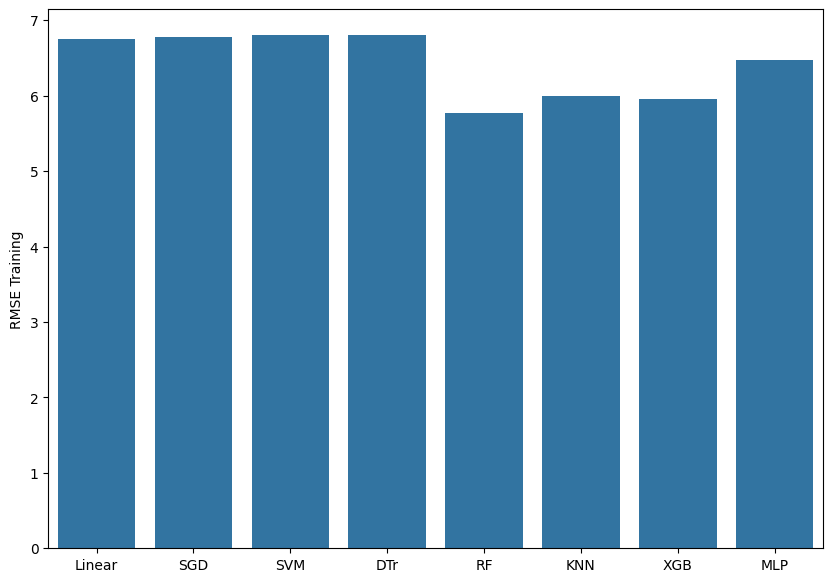

In [36]:
list_scores = [sc_linear,sc_sgd, sc_dtree, sc_dtree, sc_rf, sc_knn, sc_xgb, sc_mlp_reg]
list_predictions = [pred_linreg_all, pred_sgd, pred_svr, pred_dtree, pred_rf, pred_knn, pred_xgb, pred_mlp_reg]
list_regressors = ['Linear','SGD','SVM','DTr','RF','KNN','XGB','MLP']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE Training')
plt.show()

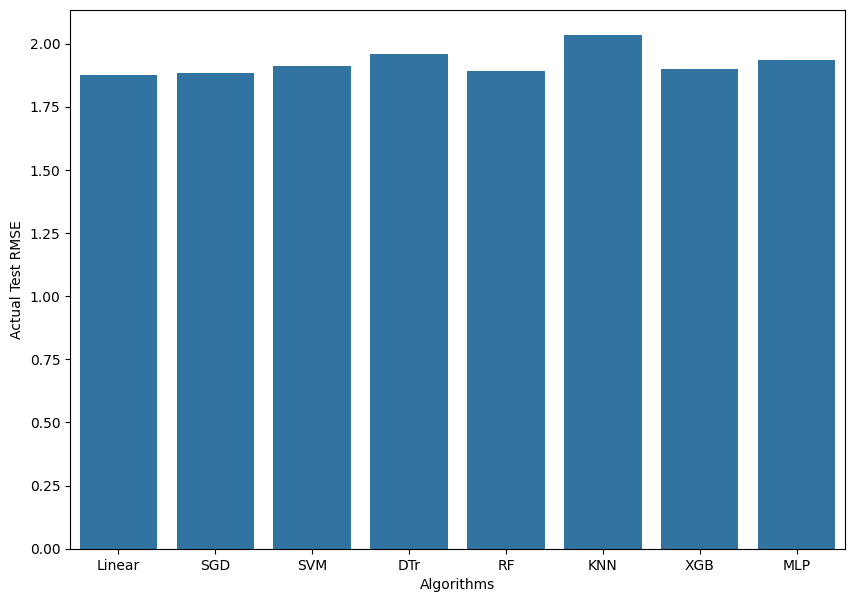

In [37]:
errors = []
for pred in list_predictions:
    errors.append(np.log(np.sqrt(mean_squared_error(y_test,pred))))

regressors = ['Linear','SGD','SVM', 'DTr','RF','KNN','XGB','MLP']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x = regressors, y = errors, ax=ax)
plt.ylabel('Actual Test RMSE')
plt.xlabel('Algorithms')
plt.show()

In [38]:
predictions = {'Linear': pred_linreg_all.ravel(),
               'SGD': pred_sgd,
               'SVM': pred_svr,
               'DTr': pred_dtree,
               'RF': pred_rf,
               'KNN': pred_knn.ravel(),
               'XGB': pred_xgb,
               'MLP':pred_mlp_reg }
df_predictions = pd.DataFrame(data=predictions)

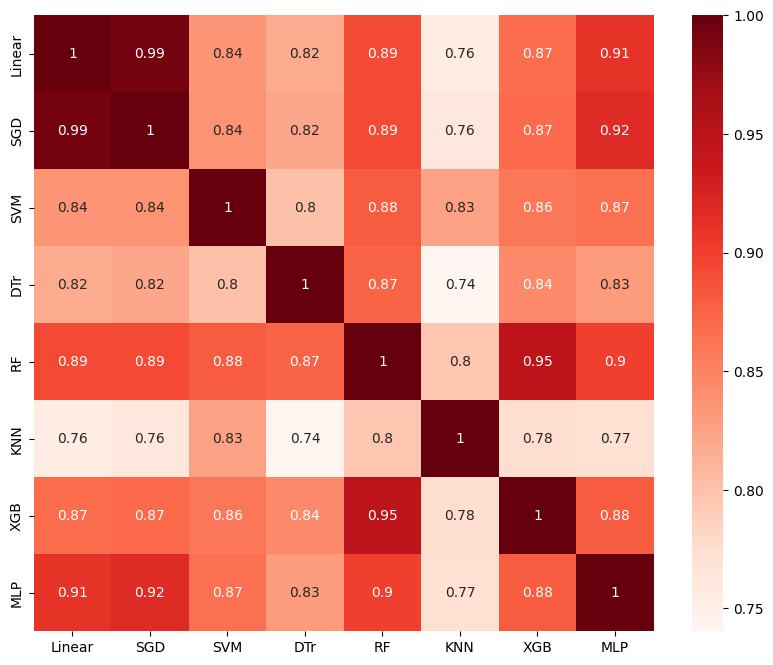

In [39]:
plt.figure(figsize=(10,8))
cor_pred = df_predictions.corr()
sns.heatmap(cor_pred, annot=True, cmap=plt.cm.Reds)
plt.show()

# Meta Model Approach

In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
#https://github.com/dataprofessor/python/blob/main/Stacking_Classifier.ipynb

estimators =[('lr', grid_linear),
    ('sdg', grid_sgd),
    ('svm', grid_svr),
    ('dt', grid_dtree),
    ('rf', grid_rf),
    ('knn', grid_knn),
    ('xgb',grid_xgb),
    ('mlp', grid_mlp_reg)
]

stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)

In [41]:
# Train stacked model
stack_model.fit(x_train.values, y_train['rh100'].values)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-33.556 total time=   1.2s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-37.192 total time=   1.2s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-52.498 total time=   1.5s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-67.274 total time=   2.0s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-72.424 total time=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-25.224 total time=  19.4s
[CV 2/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-26.678 total time=  19.8s
[CV 3/5] END min_samples_split=3, n_estimators=150, random_state=5;, score=-33.305 total time=  20.7s
[CV 4/5] END min_samples_s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-43.224 total time=   0.8s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-44.311 total time=   0.7s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-69.752 total time=   0.7s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-63.131 total time=   0.7s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-76.417 total time=   1.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=rbf;, score=-40.403 total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

StackingRegressor(estimators=[('lr',
                               GridSearchCV(cv=5, estimator=LinearRegression(),
                                            param_grid={'copy_X': [True, False],
                                                        'fit_intercept': [True,
                                                                          False]},
                                            scoring='neg_mean_squared_error',
                                            verbose=1)),
                              ('sdg',
                               GridSearchCV(cv=5, estimator=SGDRegressor(),
                                            param_grid={'alpha': [1e-05],
                                                        'epsilon': [0.01],
                                                        'fit_intercept': [True],
                                                        'max_iter': [10000]},
                                            scoring='neg_mean_sq...
                                            scoring='neg_mean_squared_error')),
                              ('mlp',
                               GridSearchCV(cv=5, estimator=MLPRegressor(),
                                            param_grid={'activation': ['logistic'],
                                                        'alpha': [5e-05],
                                                        'hidden_layer_sizes': [(50,)],
                                                        'learning_rate_init': [0.001],
                                                        'random_state': [5],
                                                        'solver': ['lbfgs']},
                                            scoring='neg_mean_squared_error',
                                            verbose=True))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [47]:
stack_model_feat = stack_model.get_feature_names_out()
stack_model_feat


array(['stackingregressor_lr', 'stackingregressor_sdg',
       'stackingregressor_svm', 'stackingregressor_dt',
       'stackingregressor_rf', 'stackingregressor_knn',
       'stackingregressor_xgb', 'stackingregressor_mlp'], dtype=object)

In [ ]:
stack_model_params = stack_model.get_params(deep=True)
stack_model_params

In [ ]:
# fn = list(x_train.columns.values)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,12), dpi=800)
# tree.plot_tree(stack_model.estimators_[0],
#                feature_names = fn,
#                class_names=['rh100'],
#                filled = True);
# fig.savefig('stack_model_individualtree.png')

In [ ]:
# sorted_idx = stack_model.feature_importances_.argsort()
# plt.barh(stack_model.feature_importances_[sorted_idx])
# plt.xlabel("stack_model Feature Importance")

## Shap viz

https://medium.com/analytics-vidhya/shap-part-2-kernel-shap-3c11e7a971b1

In [ ]:
# ## use the full dataset to viz
# explainer = shap.KernelExplainer(stack_model.predict, x_train.values)
# shap_values = explainer.shap_values(x_train.values)
# shap.summary_plot(shap_values, x_train.values, plot_type="bar")

##
explainer = shap.KernelExplainer(stack_model.predict, x_train.values)


## sample just n num of total data set https://github.com/shap/shap/issues/1197
shap_values = explainer.shap_values(x_train.values, nsamples=35)
# shap_values = explainer.shap_values( shap.sample(x_train.values, 100) )

shap.summary_plot(shap_values, x_train.values, plot_type="bar")

In [56]:
# Make predictions
y_train_pred_stack = stack_model.predict(x_train.values)
y_test_pred_stack = stack_model.predict(x_test.values)

In [55]:
# Training set model performance
print("# Training set model performance")
print("MAE train on test",mean_absolute_error(y_train,y_train_pred_stack))
print("MSE train on test",mean_squared_error(y_train,y_train_pred_stack))
r2 = r2_score(y_train,y_train_pred_stack)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_train,y_train_pred_stack))))
# print('Variance Score:', stack_model.score(x_train.values, y_train['rh100'].values))

print("--Break--")

# Test set model performance
print("# Test set model performance")
print("MAE train on test",mean_absolute_error(y_test,y_test_pred_stack))
print("MSE train on test",mean_squared_error(y_test,y_test_pred_stack))
r2 = r2_score(y_test,y_test_pred_stack)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test,y_test_pred_stack))))
# print('Variance Score:', stack_model.score(x_test.values, y_test['rh100'].values))


# Training set model performance
MAE train on test 1.7300139260725
MSE train on test 5.946260456931103
R2 train on test 0.9143176877054846
RMSE train on test 0.8913812636692832
--Break--
# Test set model performance
MAE train on test 5.1449374106975005
MSE train on test 48.75503444635766
R2 train on test 0.41481731064641225
RMSE train on test 1.9434042314031605


<Axes: xlabel='y_train', ylabel='pred'>

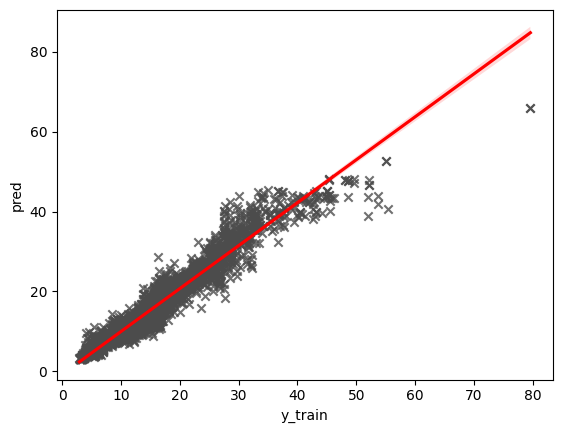

In [57]:
rf_train_plot_df = pd.DataFrame({'y_train':y_train['rh100'], 'pred':y_train_pred_stack})
# rf_test_plot_df.plot('y_test', 'pred', kind='scatter')

sns.regplot(data=rf_train_plot_df,x = 'y_train', y = 'pred',  ci=99, marker="x", color=".3", line_kws=dict(color="r"))

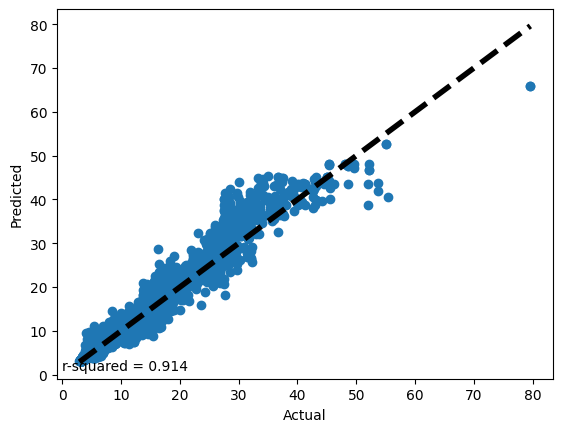

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred_stack)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
# #regression line

plt.annotate("r-squared = {:.3f}".format(r2_score(y_train, y_train_pred_stack)), (0, 1))
plt.show()

<Axes: xlabel='y_test', ylabel='pred'>

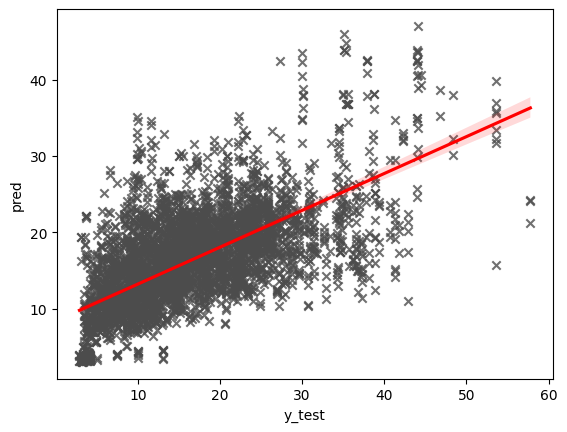

In [59]:
rf_test_plot_df = pd.DataFrame({'y_test':y_test['rh100'], 'pred':y_test_pred_stack})
# rf_test_plot_df.plot('y_test', 'pred', kind='scatter')

sns.regplot(data=rf_test_plot_df,x = 'y_test', y = 'pred',  ci=99, marker="x", color=".3", line_kws=dict(color="r"))

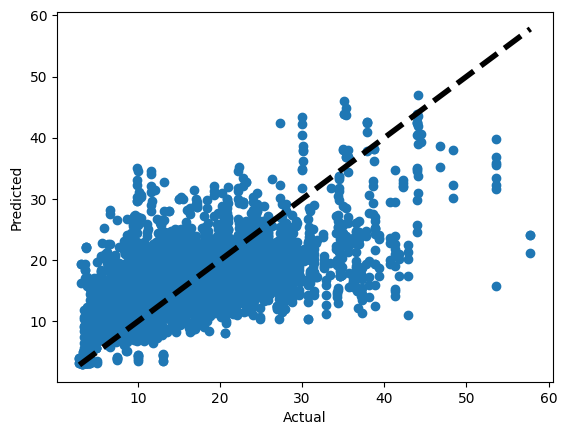

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred_stack)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
# #regression line

plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_test_pred_stack)), (0, 1))
plt.show()

Validation

In [63]:
y_val_pred_stack = stack_model.predict(x_validation.values)

In [64]:
# Test set model performance
print("# Test set model performance")
print("# Training set model performance")
print("MAE train on test",mean_absolute_error(y_validation,y_val_pred_stack))
print("MSE train on test",mean_squared_error(y_validation,y_val_pred_stack))
r2 = r2_score(y_validation,y_val_pred_stack)
print("R2 train on test", r2)
print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_validation,y_val_pred_stack))))


# Test set model performance
# Training set model performance
MAE train on test 5.30751746073
MSE train on test 48.3170474976413
R2 train on test 0.24080446482714712
RMSE train on test 1.9388922243239801


<Axes: xlabel='y_val', ylabel='pred'>

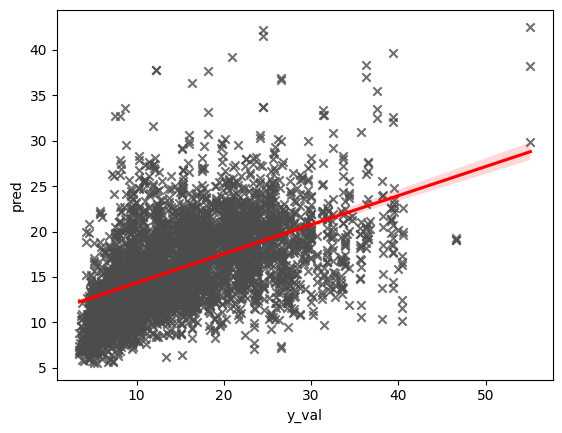

In [65]:
rf_test_plot_df = pd.DataFrame({'y_val':y_validation['rh100'], 'pred':y_val_pred_stack})
# rf_test_plot_df.plot('y_test', 'pred', kind='scatter')

sns.regplot(data=rf_test_plot_df,x = 'y_val', y = 'pred',  ci=99, marker="x", color=".3", line_kws=dict(color="r"))

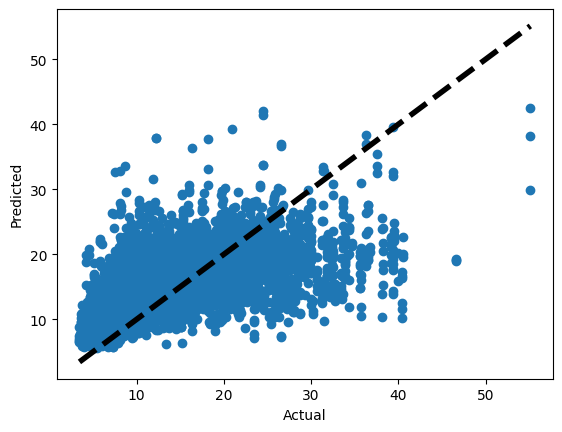

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_validation, y_val_pred_stack)
ax.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
# #regression line

plt.annotate("r-squared = {:.3f}".format(r2_score(y_validation, y_val_pred_stack)), (0, 1))
plt.show()

In [ ]:

# # Initialize base models
# rf = RandomForestRegressor(n_estimators=50, random_state=42)
# knn = KNeighborsRegressor(n_neighbors=5)
# lr = LinearRegression()

# # Fit base models on training data
# rf.fit(x_train, y_train['rh100'])
# knn.fit(x_train, y_train)
# lr.fit(x_train, y_train)

# # Generate base model predictions on training and validation data
# rf_pred_train = rf.predict(x_train)
# knn_pred_train = knn.predict(x_train)
# lr_pred_train = lr.predict(x_train)

# rf_pred_val = rf.predict(x_test)
# knn_pred_val = knn.predict(x_test)
# lr_pred_val = lr.predict(x_test)

test

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
# # Combine base model predictions into meta features
# meta_features_train = np.column_stack((rf_pred_train, knn_pred_train, lr_pred_train))
# meta_features_val = np.column_stack((rf_pred_val, knn_pred_val, lr_pred_val))

# # Initialize meta model
# ridge = Ridge(alpha=0.5)

In [ ]:
# # Fit meta model on meta features and training target variable
# ridge.fit(meta_features_train, y_train)

# # Generate meta model predictions on validation set
# meta_pred_val = ridge.predict(meta_features_val)

# from sklearn.metrics import mean_squared_error

# # Calculate MSE on validation set
# mse = mean_squared_error(y_test, meta_pred_val)
# print("MSE on validation set: {:.4f}".format(mse))


# print("MAE train on test",mean_absolute_error(y_test, meta_pred_val))

# print("MSE train on test",mean_squared_error(y_test, meta_pred_val))

# r2 = r2_score(y_test, meta_pred_val)
# print("R2 train on test", r2)

# print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test, meta_pred_val))))

In [ ]:
# meta_pred_val

In [ ]:
# rf_test_plot_df = pd.DataFrame({'y_test':y_test['rh100'], 'pred':meta_pred_val})
# # rf_test_plot_df.plot('y_test', 'pred', kind='scatter')

# sns.regplot(data=rf_test_plot_df,x = 'y_test', y = 'meta_pred_val',  ci=99, marker="x", color=".3", line_kws=dict(color="r"))